In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# 1. Ruta base y lectura de archivos CSV (sin encabezados en origen)
base = Path(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final")

areas        = pd.read_csv(base / "areas_final.csv",        header=None)
pacientes    = pd.read_csv(base / "pacientes_final.csv",    header=None)
tratamientos = pd.read_csv(base / "tratamientos_final.csv", header=None)
atenciones   = pd.read_csv(base / "atenciones_final.csv",   header=None)

# 2. Renombrar columnas y eliminar el campo residual
areas.columns        = ['area_id',        'area_name']
pacientes.columns    = ['patient_id',     'patient_name', 'age', 'gender', 'registration_date']
tratamientos.columns = ['treatment_id',   'treatment_name', 'area_id', 'price']
atenciones.columns   = ['attention_id',   'patient_id', 'treatment_id',
                        'attention_date', 'payment_type', 'status', 'extra']
atenciones.drop(columns=['extra'], inplace=True)


# 3. Formas de las tablas y primeras filas
print("=== FORMAS DE LOS DATOS ===")
print(f"Áreas:        {areas.shape}")
print(f"Pacientes:    {pacientes.shape}")
print(f"Tratamientos: {tratamientos.shape}")
print(f"Atenciones:   {atenciones.shape}\n")

print("=== PRIMERAS FILAS ===")
display(areas.head())
display(pacientes.head())
display(tratamientos.head())
display(atenciones.head())

# 4. Estadísticas numéricas básicas
print("\n=== ESTADÍSTICAS NUMÉRICAS ===")
for df, name in [(areas, 'Áreas'), (pacientes, 'Pacientes'),
                 (tratamientos, 'Tratamientos'), (atenciones, 'Atenciones')]:
    print(f"\n{name}")
    display(df.describe(include=[np.number]))

# 5. Imputación de nulos por media (solo numéricos)
for df in [pacientes, tratamientos, atenciones]:
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col].fillna(df[col].mean(), inplace=True)

# 6. Conteo de nulos y duplicados después de la imputación
print("\n=== VALORES NULOS TRAS IMPUTAR ===")
for df, name in [(areas, 'Áreas'), (pacientes, 'Pacientes'),
                 (tratamientos, 'Tratamientos'), (atenciones, 'Atenciones')]:
    print(f"{name}:")
    print(df.isnull().sum())
    
print("\n=== DUPLICADOS ===")
for df, name in [(areas, 'Áreas'), (pacientes, 'Pacientes'),
                 (tratamientos, 'Tratamientos'), (atenciones, 'Atenciones')]:
    print(f"{name}: {df.duplicated().sum()} duplicados")


=== FORMAS DE LOS DATOS ===
Áreas:        (7, 2)
Pacientes:    (500, 5)
Tratamientos: (19, 4)
Atenciones:   (1930, 6)

=== PRIMERAS FILAS ===


,area_id,area_name
0,7,Cirugía Oral
1,3,Endodoncia
2,1,Odontología General
3,5,Odontopediatría
4,2,Ortodoncia


,patient_id,patient_name,age,gender,registration_date
0,1,Eladio de Ramón,46,Otro,2024-11-03
1,2,Cándida Duque Miranda,17,F,2024-05-20
2,3,Vicenta Lasa Echevarría,40,F,2023-05-30
3,4,Goyo Felix Chacón Arregui,73,Otro,2023-08-20
4,5,Trinidad Juliá Fernandez,46,F,2024-08-07


,treatment_id,treatment_name,area_id,price
0,1,Consulta General,1,60.0
1,2,Limpieza Dental,1,180.0
2,3,Tratamiento de Caries,1,200.0
3,4,Colocación de Brackets,2,3000.0
4,5,Mantenimiento de Ortodoncia,2,200.0


,attention_id,patient_id,treatment_id,attention_date,payment_type,status
0,1,451,4,2021-01-09,Efectivo,Pagado
1,2,42,4,2021-01-20,Tarjeta,Pagado
2,3,51,4,2021-01-31,Efectivo,Pagado
3,4,59,14,2021-01-15,Efectivo,Pagado
4,5,35,14,2021-01-31,Efectivo,Pagado



=== ESTADÍSTICAS NUMÉRICAS ===

Áreas


,area_id
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000



Pacientes


,patient_id,age
count,500.000000,500.000000
mean,250.500000,41.306000
std,144.481833,20.826614
min,1.000000,5.000000
25%,125.750000,24.000000
50%,250.500000,41.000000
75%,375.250000,58.000000
max,500.000000,79.000000



Tratamientos


,treatment_id,area_id,price
count,19.000000,19.000000,19.000000
mean,10.000000,4.210526,549.473684
std,5.627314,2.043389,778.277826
min,1.000000,1.000000,20.000000
25%,5.500000,2.500000,165.000000
50%,10.000000,5.000000,200.000000
75%,14.500000,6.000000,550.000000
max,19.000000,7.000000,3000.000000



Atenciones


,attention_id,patient_id,treatment_id
count,1930.000000,1930.000000,1930.000000
mean,965.500000,250.625389,10.013990
std,557.287329,146.540812,5.231233
min,1.000000,1.000000,1.000000
25%,483.250000,120.000000,5.000000
50%,965.500000,252.000000,11.000000
75%,1447.750000,380.750000,14.000000
max,1930.000000,500.000000,19.000000



=== VALORES NULOS TRAS IMPUTAR ===
Áreas:
area_id      0
area_name    0
dtype: int64
Pacientes:
patient_id           0
patient_name         0
age                  0
gender               0
registration_date    0
dtype: int64
Tratamientos:
treatment_id      0
treatment_name    0
area_id           0
price             0
dtype: int64
Atenciones:
attention_id      0
patient_id        0
treatment_id      0
attention_date    0
payment_type      0
status            0
dtype: int64

=== DUPLICADOS ===
Áreas: 0 duplicados
Pacientes: 0 duplicados
Tratamientos: 0 duplicados
Atenciones: 0 duplicados


C:\Users\Perydox\AppData\Local\Temp\ipykernel_1720\1813667222.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [2]:
# Celda 2 – Unión de tablas y métricas derivadas
# Unión maestra
merged = (
    atenciones
    .merge(pacientes,    on='patient_id',   how='left')
    .merge(tratamientos, on='treatment_id', how='left')
    .merge(areas,        on='area_id',      how='left')
)
print(f"Dataset combinado: {merged.shape}")

# Atributos derivados
merged['attention_date'] = pd.to_datetime(merged['attention_date'])
merged['patient_age_at_visit'] = merged['age']                       # ejemplo directo
merged['price_by_area'] = merged.groupby('area_id')['price'].transform('mean')
merged['month'] = merged['attention_date'].dt.to_period('M')

# Conteo de indicadores descriptivos
print("\n=== Atenciones por Área ===")
display(merged['area_name'].value_counts())

print("\n=== Estadísticas de Edad de Pacientes ===")
display(merged['patient_age_at_visit'].describe())

# Tabla pivote Área × Tratamiento
pivot = pd.pivot_table(
    merged,
    index='area_name',
    columns='treatment_name',
    values='attention_id',
    aggfunc='count',
    fill_value=0
)
print("\n=== Pivot Área vs. Tratamiento ===")
display(pivot)


Dataset combinado: (1930, 14)

=== Atenciones por Área ===


area_name
Odontopediatría        626
Prostodoncia           597
Odontología General    256
Ortodoncia             241
Endodoncia             106
Periodoncia             85
Cirugía Oral            19
Name: count, dtype: int64


=== Estadísticas de Edad de Pacientes ===


count    1930.000000
mean       40.547150
std        20.828588
min         5.000000
25%        24.000000
50%        39.000000
75%        57.000000
max        79.000000
Name: patient_age_at_visit, dtype: float64


=== Pivot Área vs. Tratamiento ===


treatment_name,Aplicación de Flúor,Cirugía de Encías,Colocación de Brackets,Consulta General,Consulta Infantil,Corona Jacket,Corona de Oro,Coronoa de Cromo,Extracción de Muelas del Juicio,Limpieza Dental,Mantenimiento de Ortodoncia,Perno Muñón,Prótesis Completa,Prótesis Dental Parcial,Prótesis Fija Canino a Canino (pieza de cromo),Retratamiento de Conducto,Tratamiento de Caries,Tratamiento de Conducto,Tratamiento de Encías
area_name,,,,,,,,,,,,,,,,,,,
Cirugía Oral,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0
Endodoncia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,72,0
Odontología General,0,0,0,170,0,0,0,0,0,51,0,0,0,0,0,0,35,0,0
Odontopediatría,477,0,0,0,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ortodoncia,0,0,192,0,0,0,0,0,0,0,49,0,0,0,0,0,0,0,0
Periodoncia,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
Prostodoncia,0,0,0,0,0,49,193,49,0,0,0,81,26,13,186,0,0,0,0


Dimensiones tras la codificación: (1930, 43)


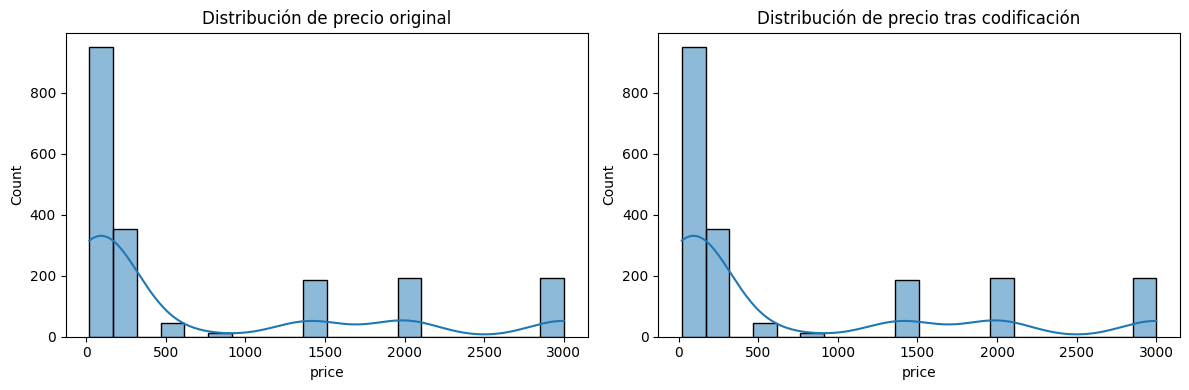

In [3]:
# Celda 3 – Conversión de fechas, one-hot encoding y verificación gráfica
# Componentes de calendario
merged['year']      = merged['attention_date'].dt.year
merged['quarter']   = merged['attention_date'].dt.quarter
merged['month_num'] = merged['attention_date'].dt.month

# One-hot encoding de categorías clave
merged_encoded = pd.get_dummies(
    merged,
    columns=['area_name', 'treatment_name', 'payment_type', 'status', 'gender'],
    drop_first=True
)
print(f"Dimensiones tras la codificación: {merged_encoded.shape}")

# Gráficos de control: distribuciones antes y después
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(merged['price'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribución de precio original")
sns.histplot(merged_encoded['price'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribución de precio tras codificación")
plt.tight_layout()
plt.show()
